<a href="https://colab.research.google.com/github/strlla4536/Deeplearning-Python/blob/main/Keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 계수 구하기 keras로


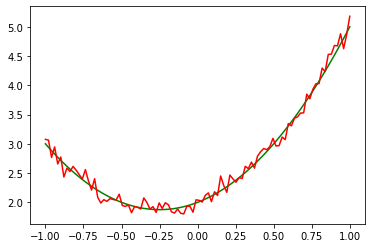

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

ngae = 100
xx=np.linspace(-1,1,ngae)
ff = 2+xx+2*xx**2

ffn = ff+np.random.normal(0,0.1,ngae)
plt.figure()
plt.plot(xx,ff,'g')
plt.plot(xx,ffn,'r')
plt.show()
nov = 80
aa = np.zeros((ngae,3))
bb=np.zeros(ngae)
for ig in range(ngae):
  aa[ig,0]=xx[ig]**2
  aa[ig,1]=xx[ig]
  aa[ig,2]=1
  bb[ig]=ffn[ig]

1. from keras.layers import Dense, Activation ; layer 쌓는 부분들을 설계
2. from keras.models import Sequential ; sequential 이라는 모델 사용 (모델 크게 API, Sequential)
3. from keras import optimizers ; (|Y-G|^2)을 최소화 하는데 부르는 library. gradient method
4. activation 
* relu : 은익층에 주로 사용
* sigmoid : 이진 분류
* softmax : 다중 분류

In [ ]:
from keras import optimizers
from keras.layers import Dense, Activation 
from keras.models import Sequential


x_train = aa[:nov,:]   #training 시키기 위한 input
y_train = bb[:nov]

model = Sequential()
model.add(Dense(5, input_dim=5, activation='relu'))
model.add(Dense(3, activation='relu'))
model.add(Dense(1,input_dim=3,activation='linear'))  #Ax=b 문제를 풀어온 것이므로 가장 비슷한 set 만든것

model.compile(loss='mse',optimizer='adam')   
  #weight3개 bias1개 정해야함. w,b를 random number로 발생시켜서 input
model.summary()

H=model.fit(x_train,y_train,batch_size=10,epochs=2000) #epochs : iteration 횟수
wt = model.get_weights()

plt.figure()
plt.plot(H.history['loss'])

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 5)                 30        
_________________________________________________________________
dense_1 (Dense)              (None, 3)                 18        
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 4         
Total params: 52
Trainable params: 52
Non-trainable params: 0
_________________________________________________________________
Epoch 1/2000


ValueError: ignored

In [ ]:
y_predict = model.predict(aa[nov:,:])  #:발생된걸로 예측
#80개까지로 훈련시켰으니까 81~100까지 20개를 예측을 집어넣는 것임
#이게 실제로 우리가 가지고 있는 값과 얼만큼 유사한 값을 갖는지
plt.figure()
plt.plot(xx[nov:],bb[nov:],'g')  #관측한 데이터
plt.plot(xx[nov:],y_predict,'r')  #예측값
plt.show()


y_predict = model.predict(aa[:,:]) #처음부터 전부 보자
plt.figure()
plt.plot(xx[:],bb[:],'g')  #관측한 데이터
plt.plot(xx[:],y_predict,'r')  #예측값
plt.show()

#Keras로 boston 집값

In [ ]:
from keras import optimizers
from keras.layers import Dense, Activation
from keras.models import Sequential
from keras.regularizers import l2
from keras.callbacks import EarlyStopping
import numpy as np
import matplotlib.pyplot as plt
import sklearn
from sklearn import datasets

boston = datasets.load_boston()
print(boston.keys())
print(boston.feature_names) #집값을 결정하는 특징들

aa= boston.data    #dict_keys[0] = data = aa
bb= boston.target    #현재 집값의 싯가
# print(type(aa))  ==> class 'numpy.ndarray'
#print(aa.shape)   #506*13 행렬. 506개의 집값과 13개의 features

nr,nc = aa.shape    #nr=row(행)=506, nc=column=13
an = np.zeros((nc,nc)) #aa^taa에 해당
bn = np.zeros(nc) 


x_train=aa[:nov,:]
y_train=bb[:nov]

model = Sequential()
model.add(Dense(5, input_dim=nc, activation ='relu'))
model.add(Dense(4, activation = 'tanh'))
model.add(Dense(2, activation = 'relu'))
model.add(Dense(1))

model.compile(loss='mse',optimizer='adam',metrics=['accuracy'])

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])
['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

import sklearn
from sklearn import datasets

boston = datasets.load_boston()
print(boston.keys())
print(boston.feature_names)
aa=boston.data
bb=boston.target

nr,nc = aa.shape


dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])
['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
Epoch 501/3000
9/9 [==============================] - 0s 2ms/step - loss: 90.2974 - accuracy: 0.0000e+00
Epoch 502/3000
9/9 [==============================] - 0s 2ms/step - loss: 90.3010 - accuracy: 0.0000e+00
Epoch 503/3000
9/9 [==============================] - 0s 2ms/step - loss: 90.2974 - accuracy: 0.0000e+00
Epoch 504/3000
9/9 [==============================] - 0s 2ms/step - loss: 90.3137 - accuracy: 0.0000e+00
Epoch 505/3000
9/9 [==============================] - 0s 2ms/step - loss: 90.2946 - accuracy: 0.0000e+00
Epoch 506/3000
9/9 [==============================] - 0s 2ms/step - loss: 90.2955 - accuracy: 0.0000e+00
Epoch 507/3000
9/9 [==============================] - 0s 2ms/step - loss: 90.3049 - accuracy: 0.0000e+00
Epoch 508/3000
9/9 [==============================] - 0s 3ms/step - loss: 90.2985 - accuracy: 0.0000e+00
Epoch 509/3000
9/9 [==============================] - 0s 2ms/step - loss: 90.3007 - accuracy: 0.0000e+00
Epoch 510/3000
9/9 

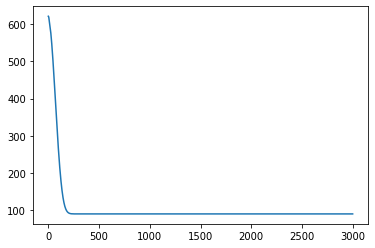

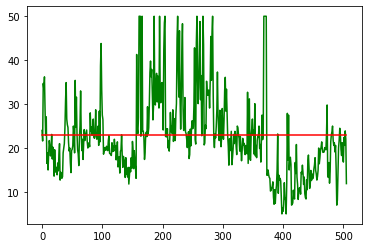

In [ ]:
from keras import optimizers
from keras.layers import Dense, Activation
from keras.models import Sequential

nov=450
x_train=aa[:nov,:]
y_train=bb[:nov]

model = Sequential()
model.add(Dense(5, input_dim=nc, activation ='relu'))
model.add(Dense(4, activation = 'tanh'))
model.add(Dense(2, activation = 'relu'))
model.add(Dense(1))
model.summary()

model.compile(loss = 'mse', optimizer = 'adam',metrics=['accuracy'])

H=model.fit(x_train, y_train, batch_size=50, epochs=3000)

plt.figure()
plt.plot(H.history['loss'])

y_predict = model.predict(aa[:,:])
plt.figure()
plt.plot(bb[:],'g')
plt.plot(y_predict,'r')
plt.show()

#MNIST DATA (손글씨)
#MLP

* total parameters = (input_dimension)*(class) + bias

<class 'tuple'>


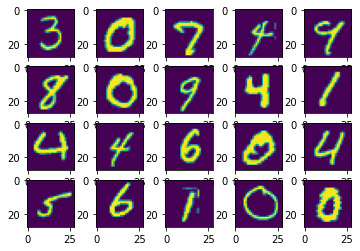

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_11 (Dense)             (None, 10)                7850      
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
1200/1200 [==============================] - 2s 1ms/step - loss: 0.5535 - accuracy: 0.8637
Epoch 2/10
1200/1200 [==============================] - 2s 1ms/step - loss: 0.3177 - accuracy: 0.9129
Epoch 3/10
1200/1200 [==============================] - 2s 1ms/step - loss: 0.2914 - accuracy: 0.9192
Epoch 4/10
1200/1200 [==============================] - 2s 1ms/step - loss: 0.2794 - accuracy: 0.9227
Epoch 5/10
1200/1200 [==============================] - 2s 1ms/step - loss: 0.2719 - accuracy: 0.9241
Epoch 6/10
1200/1200 [==============================] - 2s 1ms/step - loss: 0.2656 - accuracy: 0.9263
Epoch 7/10
1200/1200 [============

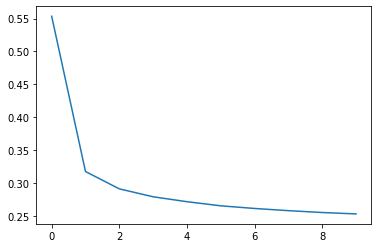

313/313 [==============================] - 0s 918us/step - loss: 0.2658 - accuracy: 0.9267
Acc= [0.26576167345046997, 0.9266999959945679]


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.utils import np_utils
import numpy as np
from keras.datasets import mnist

np.random.seed(777)

tmp=mnist.load_data()
#print(type(tmp))   #tuple : list 변수의 사촌격. tuple, dictionary etc. 2개의 data 나열된 구조. 
#(train 할 수 있는 data, 이 data를 classify 한 것 )(test 할 것들)

x_train, y_train = tmp[0]
x_test, y_test = tmp[1]

fig=plt.figure()
for ie in range(20):  #그림을 한번에 20개 올릴것
  subplot=fig.add_subplot(4,5,ie+1) #그림의 figure를 하나만 만들고,4*5=20 개의 그림을 그림
  #ie+1 : 실질적으로 ie가 0부터 19까지 들어가는데, subplot은 1부터 시작해야돼서(윈도우 창이니까)
  subplot.imshow(x_train[ie,:,:])  #60000개에서 처음의 20개 그리려고 하는것. 어떻게 생겻는지
plt.show()


#data의 shape을 먼저 알아서 dimension들이 어떻게 돼있는지 include시키는게 일반적으로 처음에 하는 일
n_class = 10
n_train, nx, ny = x_train.shape
n_test, nx, ny=x_test.shape #익숙한 변수 선언하고 나중에 변수만 바꾸면됨
x_train=x_train.astype('float32')/255 #n_train,nx,ny 사이즈를 가지고 있는 행렬의 data들이 0과 1 사이로 나눠져있고,
# 각각이 실수형인 변수형태로 갖춰지게됨
x_test=x_test.astype('float32')/255
y_train = np_utils.to_categorical(y_train,n_class)
y_test = np_utils.to_categorical(y_test,n_class)
x_train=x_train.reshape(n_train,nx*ny)
x_test =x_test.reshape(n_test,nx*ny)

model=Sequential()
model.add(Dense(n_class,input_dim=nx*ny,activation='sigmoid'))  #하나의 layer. 이걸 통과하면 바로 열 개 나오는 가장 심플한 구조
#model.add(Dense(n_class,input_dim=nx*ny,activation='relu')) 
#model.add(Dense(n_class,input_dim=nx*ny,activation='softmax')) 
model.summary()
#10개 나오도록 맞춰주는거

model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
H=model.fit(x_train,y_train,batch_size=50,epochs=10)  
#6만개 데이터를 10번 돌리는데, 돌릴때마다 50개씩 끊어서 gradient 계산하겠다는 명령

plt.figure()
plt.plot(H.history['loss'])
plt.show()

score = model.evaluate(x_test,y_test)
print('Acc=',score)

직접 그린걸로 테스트 해보자

In [ ]:
from google.colab import drive
drive.mount('/content/drive/MyDrive/Colab Notebooks/수학프로그래밍 실습 2020 권오인pf/tmp1.png')

import imageio

im=imageio.imread('tmp1.png')
im2=1-im.astype('float32')/255   #1-im.astype : background 0으로   #이렇게 나눠야 범위가 normalize돼서 0과 1 사이됨  
  #im2 = im.astype('float32)/255 ==> background 0
plt.figure()
plt.imshow(im2[:,:,1])
plt.show()
tt=im2[:,:,1]
im3=tt.reshape(1,nx*ny)

rst=model.predict(im2[:,:,])
for ie in range(10):
  print(ie,rst[0,ie])

plt.figure()
plt.plot(rst[0,:])
plt.show()

FileNotFoundError: ignored

이제 예측값을 보자

* np.argmax  : 가장 큰 값 보여주는 numpy 함수

In [ ]:
rst_label = np.argmax(rst[0,:])  

prd_test=model.predict(x_test)
prd_label=np.argmax(prd_test,axis=1)   #예측값
y_label=np.argmax(y_test,axis=1)    #y_test: 우리가 정한 실제값. 예측값과 참값이 차이나는 것들 보려함

wrong = []
for ie in range(len(y_test)):          #len(y_test)=10000
  if prd_label[ie] != y_label[ie]:
    wrong.append(ie)

plt.figure()
plt.imshow(x_test[wrong[0],:],reshape(nx,ny))
tmp = 'y_label='+ str(y_label[wrong[0]])
tmp2 = ', prd_label=' +str(prd_label[wrong[0]])
plt.tilte(tmp+tmp2)
plt.show()


#여러개 한번에 보기
fig=plt.figure()
for ie in range(20):
  subplot=fig.add_subplot(4,5,ie+1) 
  subplot.imshow(x_test[wrong[ie],:],reshape(nx,ny))
  tmp = 'y='+ str(y_label[wrong[ie]])
tmp2 = ', prd=' +str(prd_label[wrong[ie]])
plt.tilte(tmp+tmp2)
plt.show()

plt.figure()
plt.plot(prd_test[wrong[0],:])

NameError: ignored

* ***Dropout*** ; 주어진 모델 변화시키지 않고 정확도 높이기

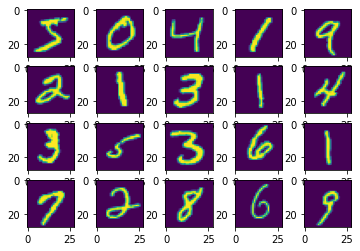

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_16 (Dense)             (None, 256)               200960    
_________________________________________________________________
dropout_3 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_17 (Dense)             (None, 256)               65792     
_________________________________________________________________
dropout_4 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_18 (Dense)             (None, 256)               65792     
_________________________________________________________________
dropout_5 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_19 (Dense)             (None, 10)               

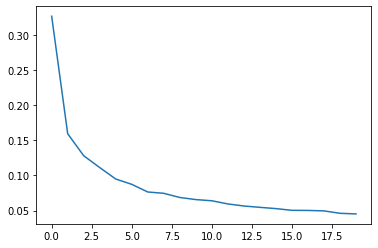

313/313 [==============================] - 0s 1ms/step - loss: 0.0819 - accuracy: 0.9814
Acc= [0.08186400681734085, 0.9814000129699707]


ValueError: ignored

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout
from keras.utils import np_utils
from keras import regularizers
import numpy as np
from keras.datasets import mnist
from google.colab import drive

np.random.seed(777)

tmp=mnist.load_data()
x_train,y_train = tmp[0]
x_test, y_test = tmp[1]

fig=plt.figure()
for ie in range(20):
  subplot=fig.add_subplot(4,5,ie+1)
  subplot.imshow(x_train[ie,:,:])
plt.show()

n_class=10
n_train,nx,ny=x_train.shape
n_test,nx,ny=x_test.shape
x_train=x_train.astype('float32')/255
x_test=x_test.astype('float32')/255
y_train=np_utils.to_categorical(y_train,n_class)
y_test=np_utils.to_categorical(y_test,n_class)
x_train=x_train.reshape(n_train,nx*ny)
x_test=x_test.reshape(n_test,nx*ny)

model=Sequential()
model.add(Dense(256,input_dim = nx*ny,
                kernel_regualarizer = regularizers.l2(0.001),activation='relu'))
model.add(Dropout(0.3))     #약 30% 제거
model.add(Dense(128,input_dim = nx*ny,
                kernel_regualarizer = regularizers.l2(0.001), activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(64,input_dim = nx*ny,
                kernel_regualarizer = regularizers.l2(0.001), activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(n_class,activation='softmax'))
model.summary()

model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
H=model.fit(x_train,y_train,batch_size=50,epochs=20)

plt.figure()
plt.plot(H.history['loss'])
plt.show()

score=model.evaluate(x_test,y_test)
print('Acc=',score)

import imageio
im=imagio.imread('tmp1.png')
im2=1-im.astype('float32')/255
plt.figure()
plt.imshow(im2[:,:,1])
plt.show()
tt=im2[:,:,1]
im3=tt.reshape((1,nx*xy))

rst=model.predict(im2[:,:,])
for ie in range(10):
  print(ie,rst[0,ie])

plt.figure()
plt.plot(rst[0,:])
plt.show()



**Convolutional Neural Networks(CNN) : convnets**
* feature extraction - 특성맵

11493376/11490434 [==============================] - 0s 0us/step


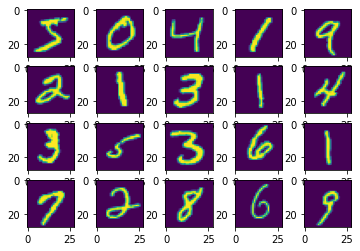

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 30)        300       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 30)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 40)        10840     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 40)          0         
_________________________________________________________________
dropout (Dropout)            (None, 5, 5, 40)          0         
_________________________________________________________________
flatten (Flatten)            (None, 1000)              0         
_________________________________________________________________
dense_14 (Dense)             (None, 128)              

ValueError: ignored

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Flatten
from keras.utils import np_utils
from keras.layers import Conv2D, MaxPooling2D
from keras import regularizers
import numpy as np
from keras.datasets import mnist

np.random.seed(777)

tmp=mnist.load_data()
x_train,y_train = tmp[0]
x_test, y_test = tmp[1]

fig=plt.figure()
for ie in range(20):
  subplot=fig.add_subplot(4,5,ie+1)
  subplot.imshow(x_train[ie,:,:])
plt.show()

n_class=10
n_train,nx,ny=x_train.shape
n_test,nx,ny=x_test.shape
x_train=x_train.astype('float32')/255
x_test=x_test.astype('float32')/255
y_train=np_utils.to_categorical(y_train,n_class)
y_test=np_utils.to_categorical(y_test,n_class)
x_train=x_train.reshape(n_train,nx*ny)
x_test=x_test.reshape(n_test,nx*ny,1)

model=Sequential()
model.add(Conv2D(30,(3,3),activation = 'relu', input_shape=(28,28,1)))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(40,(3,3), activation='relu'))
model.add(MaxPooling2D((2,2)))
model.add(Dropout(0.3))
model.add(Flatten())
model.add(Dense(128,activation = 'relu'))
model.add(Dropout(0.3))
model.add(Dense(n_class,activation='softmax'))
model.summary()

model.compile(loss='categorical_crossentropy',optimizer='adam',
              metrics=['accuracy'])
H=model.fit(x_train,y_train,batch_size=50,epochs=20)

plt.figure()
plt.plot(H.history['loss'])
plt.show()

score=model.evaluate(x_test,y_test)
print('Acc=',score)

import imageio

im=imagio.imread('tmp1.png')
im2=1-im.astype('float32')/255
plt.figure()
plt.imshow(im2[:,:,1])
plt.show()
tt=im2[:,:,1]
im3=tt.reshape((1,nx*xy))

rst=model.predict(im2[:,:,])
for ie in range(10):
  print(ie,rst[0,ie])

plt.figure()
plt.plot(rst[0,:])
plt.show()

rst_label = np.argmax(rst[0,:])

prd_test=model.predict(x_test)
prd_label=np.argmax(prd_test,axis=1)
y_label=np.argmax(y_test,axis=1)

wrong = []
for ie in range(len(y_test)):
  if prd_label[ie] != y_label[ie]:
    wrong.append(ie)
print('Wrong Number=',len(wrong))

plt.figure()
plt.imshow(x_test[wrong[0],:],reshape(nx,ny))
tmp = 'y_label='+ str(y_label[wrong[0]])
tmp2 = ', prd_label=' +str(prd_label[wrong[0]])
plt.tilte(tmp+tmp2)
plt.show()

fig=plt.figure()
for ie in range(20):
  subplot=fig.add_subplot(4,5,ie+1) 
  subplot.imshow(x_test[wrong[ie],:],reshape(nx,ny))
  tmp = 'y='+ str(y_label[wrong[ie]])
tmp2 = ', prd=' +str(prd_label[wrong[ie]])
plt.tilte(tmp+tmp2)
plt.show()

plt.figure()
plt.plot(prd_test[wrong[0],:]) 

Filter가 어떻게 적용되는지 보자

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Flatten
from keras.utils import np_utils
from keras.layers import Conv2D, MaxPooling2D
from keras import regularizers
import numpy as np
from keras.datasets import mnist

np.random.seed(777)

tmp=mnist.load_data()
x_train,y_train = tmp[0]
x_test, y_test = tmp[1]

fig=plt.figure()
for ie in range(20):
  subplot=fig.add_subplot(4,5,ie+1)
  subplot.imshow(x_train[ie,:,:])
plt.show()

n_class=10
n_train,nx,ny=x_train.shape
n_test,nx,ny=x_test.shape
x_train=x_train.astype('float32')/255
x_test=x_test.astype('float32')/255
y_train=np_utils.to_categorical(y_train,n_class)
y_test=np_utils.to_categorical(y_test,n_class)
x_train=x_train.reshape(n_train,nx*ny)
x_test=x_test.reshape(n_test,nx*ny,1)

model=Sequential()
model.add(Conv2D(30,(3,3),strides = (1,1), padding = 'same', activation = 'relu', input_shape=(28,28,1)))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(40,(3,3),strides = (1,1), padding = 'same', activation='relu'))
model.add(MaxPooling2D((2,2)))
model.add(Dropout(0.3))
model.add(Flatten())
model.add(Dense(128,activation = 'relu'))  
model.add(Dropout(0.3))
model.add(Dense(n_class,activation='softmax'))
model.summary()

model.compile(loss='categorical_crossentropy',optimizer='adam',
              metrics=['accuracy'])
H=model.fit(x_train,y_train,batch_size=50,epochs=10)

plt.figure()
plt.plot(H.history['loss'])
plt.show()

score=model.evaluate(x_test,y_test)
print('Acc=',score)

import imageio

im=imagio.imread('tmp1.png')
im2=1-im.astype('float32')/255
plt.figure()
plt.imshow(im2[:,:,1])
plt.show()
tt=im2[:,:,1]
im3=tt.reshape((1,nx*xy))

rst=model.predict(im2[:,:,])
for ie in range(10):
  print(ie,rst[0,ie])

plt.figure()
plt.plot(rst[0,:])
plt.show()

rst_label = np.argmax(rst[0,:])

prd_test=model.predict(x_test)
prd_label=np.argmax(prd_test,axis=1)
y_label=np.argmax(y_test,axis=1)

wrong = []
for ie in range(len(y_test)):
  if prd_label[ie] != y_label[ie]:
    wrong.append(ie)
print('Wrong Number=',len(wrong))

plt.figure()
plt.imshow(x_test[wrong[0],:],reshape(nx,ny))
tmp = 'y_label='+ str(y_label[wrong[0]])
tmp2 = ', prd_label=' +str(prd_label[wrong[0]])
plt.tilte(tmp+tmp2)
plt.show()

fig=plt.figure()
for ie in range(20):
  subplot=fig.add_subplot(4,5,ie+1) 
  subplot.imshow(x_test[wrong[ie],:],reshape(nx,ny))
  tmp = 'y='+ str(y_label[wrong[ie]])
tmp2 = ', prd=' +str(prd_label[wrong[ie]])
plt.tilte(tmp+tmp2)
plt.show()






#filter가 어떻게 작용되는지 보자
#그러려면 영상을 가져와야함
t_img=x_test[wrong[0],:].reshape(nx,ny)   #y_label=3, prd_label=5 : 하나의 사진으로보고
#t_img.shape  => (28,28)
lwin=np.zeros([3,3])
#lwin[:,0]=-1
#lwin[:,2]=1
    #x방향 미분
lwin[0,:] = -1
lwin[2,:] = 1
    #y방향 미분


flt_img=np.zeros([nx-2,ny-2])  #padding 안줬으므로 filter 통과되면 2개가 줄어들것임
#flt_img에 원래의 t_img를 lwin라고 한 filter를 통과시켰을 때 어떤 영상이 나오도록 잡아야함
for ix in range(1,nx-1): #t_img 통과시키려함
  for iy in range(1,ny-1):
    ss=0  #sum이라는 변수
    for ii in range(3): 
          for jj in range(3):
                  ss=ss+t_img[ix-1+ii,iy-1+jj]*lwin[ii,jj] #각각의 component 곱해서 더함
    flt_img[ix-1,iy-1]=ss

plt.figure()
plt.imshow(flt_img)
plt.show()




#MaxPooling 보자
#n개를 2*2 영상으로 가지고 MaxPooling을 하고 strides=1이라고 하자
# =>원래 영상보다 하나 작은 사이즈 나와야함
#t_img에 MaxPooling 작동시켜서 보자

nr=nx-1
pl_img=np.zeros([nr,nr])  #Pooling Image
for ix in ragne(nr):
  for iy in range(nr):
       #2D영상에선 이런 double loop 많이 씀(x방향,y방향이니까)
       pl_img[ix,iy]=np.max(t_img[ix:ix+2,iy:iy+2])
          #원래 t_img를 ix라는변수 움직일 때마다 (2,2)로 local하게 잡아서 최댓값 뽑아내기
#더 단순화된 영상 만듦

plt.figure()
plt.imshow(pl_img)
plt.show()

ImportError: ignored

# 개 고양이 구분하기 - 특성

개 사진 only 

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Flatten
from keras.utils import np_utils
from keras.layers import Conv2D, MaxPooling2D
from keras import regularizers
import numpy as np
import glob  #directory 안의 file 불러들이는 명령
from keras.preprocessing import image #data load 시키는 또다른 library
import cv2

data_dir = 'dataset/training_set/dogs'  #data directory 
#data생성, training, 예측  : 크게 이 3가지 part 
file_list = glob.glob(data_dir+'/*.jpg')  #*.jpg : 확장자 jpg인 모든것을 지칭
#file_list : 그림을 load한건 아니고 그림들의 파일명만 load
print(file_list[0],len(file_list))
nres=150

fig=plt.figure()
for ie in range(20):
  subplot=fig.add_subplot(4,5,ie+1) 
  img = image.load_img(file_list[ie], target_size = (nres,nres))
  subplot.imshow(img)
plt.show()

#전부 load시키자
x_data = []
for ie in range(len(file_list)):
  img = image.load_img(file_list[ie], target_size = (nres,nres))
  x_data.append(image.img_to_array(img)/255) #/255 : normalize
  #len(x_data) : 4000

tmp = x_data[0]
print(tmp.shape)
fig=plt.figure()
for ie in range(3):
  subplot=fig.add_subplot(1,3,ie+1) 
  subplot.imshow(tmp[:,:,ie])
plt.show()

#x_data가 list이므로 우리가 원하는 x_train 구조로 끌고와야함
x_train = np.array(x_data)
#개에 1, 고양이에 0 대응시켜서 0인지 1인지 맞추도록
y_train = np.zeros([len(x_train),1]).astype('int')+1


np.random.seed(777)

tmp=mnist.load_data()
x_train,y_train = tmp[0]
x_test, y_test = tmp[1]

fig=plt.figure()
for ie in range(20):
  subplot=fig.add_subplot(4,5,ie+1)
  subplot.imshow(x_train[ie,:,:])
plt.show()

n_class=10
n_train,nx,ny=x_train.shape
n_test,nx,ny=x_test.shape
x_train=x_train.astype('float32')/255
x_test=x_test.astype('float32')/255
y_train=np_utils.to_categorical(y_train,n_class)
y_test=np_utils.to_categorical(y_test,n_class)
x_train=x_train.reshape(n_train,nx*ny)
x_test=x_test.reshape(n_test,nx*ny,1)

model=Sequential()
model.add(Conv2D(30,(3,3),strides = (1,1), padding = 'same', activation = 'relu', input_shape=(28,28,1)))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(40,(3,3),strides = (1,1), padding = 'same', activation='relu'))
model.add(MaxPooling2D((2,2)))
model.add(Dropout(0.3))
model.add(Flatten())
model.add(Dense(128,activation = 'relu'))  
model.add(Dropout(0.3))
model.add(Dense(n_class,activation='softmax'))
model.summary()

model.compile(loss='categorical_crossentropy',optimizer='adam',
              metrics=['accuracy'])
H=model.fit(x_train,y_train,batch_size=50,epochs=10)

plt.figure()
plt.plot(H.history['loss'])
plt.show()

score=model.evaluate(x_test,y_test)
print('Acc=',score)

import imageio

im=imagio.imread('tmp1.png')
im2=1-im.astype('float32')/255
plt.figure()
plt.imshow(im2[:,:,1])
plt.show()
tt=im2[:,:,1]
im3=tt.reshape((1,nx*xy))

rst=model.predict(im2[:,:,])
for ie in range(10):
  print(ie,rst[0,ie])

plt.figure()
plt.plot(rst[0,:])
plt.show()

rst_label = np.argmax(rst[0,:])

prd_test=model.predict(x_test)
prd_label=np.argmax(prd_test,axis=1)
y_label=np.argmax(y_test,axis=1)

wrong = []
for ie in range(len(y_test)):
  if prd_label[ie] != y_label[ie]:
    wrong.append(ie)
print('Wrong Number=',len(wrong))

plt.figure()
plt.imshow(x_test[wrong[0],:],reshape(nx,ny))
tmp = 'y_label='+ str(y_label[wrong[0]])
tmp2 = ', prd_label=' +str(prd_label[wrong[0]])
plt.tilte(tmp+tmp2)
plt.show()

fig=plt.figure()
for ie in range(20):
  subplot=fig.add_subplot(4,5,ie+1) 
  subplot.imshow(x_test[wrong[ie],:],reshape(nx,ny))
  tmp = 'y='+ str(y_label[wrong[ie]])
tmp2 = ', prd=' +str(prd_label[wrong[ie]])
plt.tilte(tmp+tmp2)
plt.show()

#filter가 어떻게 작용되는지 보자
t_img=x_test[wrong[0],:].reshape(nx,ny) 
lwin=np.zeros([3,3])
#lwin[:,0]=-1
#lwin[:,2]=1
lwin[0,:] = -1
lwin[2,:] = 1

flt_img=np.zeros([nx-2,ny-2]) 
for ix in range(1,nx-1):
  for iy in range(1,ny-1):
    ss=0  
    for ii in range(3): 
          for jj in range(3):
                  ss=ss+t_img[ix-1+ii,iy-1+jj]*lwin[ii,jj] 
    flt_img[ix-1,iy-1]=ss

plt.figure()
plt.imshow(flt_img)
plt.show()


#MaxPooling 
nr=nx-1
pl_img=np.zeros([nr,nr])
for ix in ragne(nr):
  for iy in range(nr):
       pl_img[ix,iy]=np.max(t_img[ix:ix+2,iy:iy+2])
      
plt.figure()
plt.imshow(pl_img)
plt.show()

IndexError: ignored

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Flatten
from keras.utils import np_utils
from keras.layers import Conv2D, MaxPooling2D
from keras import regularizers
import data_generator as dg
import glob 
from keras.preprocessing import image 
import cv2

def datagenerator(data dir = 'dataset/training_set/dogs'):
  import numpy as np
  import glob
  from keras.preprocessing import image

  file_list = glob.glob(data_dir+'/*.jpg')
  print(file_list[0],len(file_list))
  nres=150

  x_data = []
    for ie in range(len(file_list)):
    img = image.load_img(file_list[ie], target_size = (nres,nres))
    x_data.append(image.img_to_array(img)/255)

    x_train = np.array(x_data)
    y_train = np.zeros([len(x_train),1]).astype('int')+1



data_dir = 'dataset/training_set/dogs'
x_train_dog,y_train_dog = dg.data_generator()
data_dir = 'dataset/training_set/cats'
x_train_cat, y_train_cat = dg.data_generator()
y_train_cat = y_train_cat-1

x_train = np.concatenate((x_train_dog, x_train_cat))
y_train = np.concatenate((y_train_dog, y_train_cat))
#우리가 훈련시킬 땐 x_train_dog와 x_train_cat이 한꺼번에 잡혀서 들어가야하는데 지금 각각 4000개씩 있음. 
#이 둘을 합쳐서 x_train 만드려고 concatenate 씀.
#concatenate : 합칠 file들을 써주고, axis를 어떤 기준에서 합칠건지 결정
#default : axis=0 이니까 그냥 써도 됨


np.random.seed(777)

tmp=mnist.load_data()
x_train,y_train = tmp[0]
x_test, y_test = tmp[1]

fig=plt.figure()
for ie in range(20):
  subplot=fig.add_subplot(4,5,ie+1)
  subplot.imshow(x_train[ie,:,:,0]) #3가지중 첫번째 color 불렀으므로 RGB중 R의 농도값이 나올것
plt.show()


n_train,nx,ny,ncol=x_train.shape  #ncol : ncolor

model=Sequential()
model.add(Conv2D(30,(3,3),strides = (1,1), 
                 padding = 'same', activation = 'relu', input_shape=(nx,ny,ncol)))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(40,(3,3),strides = (1,1), 
                 padding = 'same', activation='relu'))
model.add(MaxPooling2D((2,2)))
model.add(Dropout(0.3))
model.add(Flatten())
model.add(Dense(128,activation = 'relu'))  
model.add(Dropout(0.3))
model.add(Dense(1,activation='sigmoid')) 
#Dense 1 을 하면 0~1사이 어떤 실수값을 줄텐데 sigmoid로 부르면 0인지 1인지 값으로 return 해주기 위해 softmax 아닌 sigmoid
model.summary()

model.compile(loss='binary_crossentropy',optimizer='adam',
              metrics=['accuracy']) #binary : 둘 중 하나의 crossentropy 쓰는것이라
H=model.fit(x_train,y_train,batch_size=50,epochs=10)

plt.figure()
plt.plot(H.history['loss'])
plt.show()


x_test, y_test 추가
*model.save('cat_dog_e10.h5')  
    프로그래밍 죽여도 모델 날아가지 않도록 저장함. 

    e10 = epochs10.

    나중에 model.load 로 다시 불러와서 사용 가능.

    프로그램 돌린곳에 model 파일이 생성될 것

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Flatten
from keras.utils import np_utils
from keras.layers import Conv2D, MaxPooling2D
from keras import regularizers
import data_generator as dg
import glob 
from keras.preprocessing import image 
import cv2

data_dir = 'dataset/training_set/dogs'
x_train_dog,y_train_dog = dg.data_generator()
data_dir = 'dataset/training_set/cats'
x_train_cat, y_train_cat = dg.data_generator()
y_train_cat = y_train_cat-1

x_train = np.concatenate((x_train_dog, x_train_cat))
y_train = np.concatenate((y_train_dog, y_train_cat))

data_dir = 'dataset/test_set/dogs'
x_test_dog, y_test_dog = dg.data_generator()
data_dir = 'dataset/test_set/cats'
x_test_cat, y_test_cat = dg.data_generator()
y_test_cat = y_test_cat-1

x_test = np.concatenate((x_test_dog, x_test_cat))
y_test = np.concatenate((y_test_dog, y_test_cat))



np.random.seed(777)

tmp=mnist.load_data()
x_train,y_train = tmp[0]
x_test, y_test = tmp[1]

fig=plt.figure()
for ie in range(20):
  subplot=fig.add_subplot(4,5,ie+1)
  subplot.imshow(x_train[ie,:,:,0])
plt.show()


n_train,nx,ny,ncol=x_train.shape 

model=Sequential()
model.add(Conv2D(30,(3,3),strides = (1,1), 
                 padding = 'same', activation = 'relu', input_shape=(nx,ny,ncol)))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(40,(3,3),strides = (1,1), 
                 padding = 'same', activation='relu'))
model.add(MaxPooling2D((2,2)))
model.add(Dropout(0.3))
model.add(Flatten())
model.add(Dense(128,activation = 'relu'))  
model.add(Dropout(0.3))
model.add(Dense(1,activation='sigmoid')) 
model.summary()

model.compile(loss='binary_crossentropy',optimizer='adam',
              metrics=['accuracy'])
H=model.fit(x_train,y_train,batch_size=50,epochs=10)

plt.figure()
plt.plot(H.history['loss'])
plt.show()

score = model.evaluate(x_test,y_test)
print('Acc=',score)

model.save('cat_dog_e10.h5')  
#프로그래밍 죽여도 모델 날아가지 않도록 저장함. e10 = epochs10
#나중에 model.load 로 다시 불러와서 사용 가능
#프로그램 돌린곳에 model 파일이 생성될 것
ww
nres=150
img = image.load_img('my_dog3.jpg', target_size = (nres,nres))
plt.figure()
plt.imshow(im2[:,:,1])
plt.show()
im2= image.img_to_array(img)/255  #normalize
im3 = im2.reshape((1,nres,nres,3))
rst = model.predict(im3)  #앞에서 트레이닝 시켰던 모델에 교수님 강아지 넣어서 돌리기
#손글씨 했던걸 기억해보면, 0~9까지의 값 중 가장 큰 값을 대푯값으로 줬었음
#마찬가지로 rst 자체는 0~1 사이의 값(binary니까)
 

from keras import models  #model 정보를 불러올 수 있는 모듈
layer_outputs = [layer.output for layer in model.layers[:4]]
activation_model = model.Model(inputs = model.input, outputs = layer_outputs)

activations = activation_model.predict(im3)
first_layer=activations[0]
print(first_layer_activation.shape)
plt.matshow(first_layer_activation[0,:,:,1], cmap = 'viridis')

plt.matshow(im3[0,:,:0], cmap = 'viridis') 
plt.matshow(first_layer[0,:,:0], cmap = 'viridis') #1번째 filtering
plt.matshow(first_layer[0,:,:1], cmap = 'viridis') #2번째 filtering

flg = plt.figure()
for ie in range(30):
  subplot = fig.add_subplot(5,6,ie+1)
  subplot.matshow(first_layer[0,:,:,ie], cmap = 'viridis')
plt.show()
          
activations = activation_model.predict(im3)
first_layer=activations[2]

plt.matshow(im3[0,:,:0], cmap = 'viridis') 
plt.matshow(first_layer[0,:,:0], cmap = 'viridis') #1번째 filtering
plt.matshow(first_layer[0,:,:1], cmap = 'viridis') #2번째 filtering

flt = plt.figure()
for ie in range(30):
  subplot = fig.add_subplot(5,6,ie+1)
  subplot.matshow(first_layer[0,:,:,ie], cmap = 'viridis')
plt.show()

#Convnet 예제2) 그림 data 분류


170500096/170498071 [==============================] - 4s 0us/step


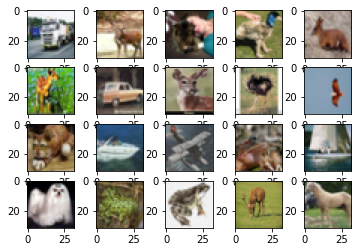

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 30)        840       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 30)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 16, 16, 40)        10840     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 8, 40)          0         
_________________________________________________________________
dropout_6 (Dropout)          (None, 8, 8, 40)          0         
_________________________________________________________________
flatten (Flatten)            (None, 2560)              0         
_________________________________________________________________
dense_20 (Dense)             (None, 128)              

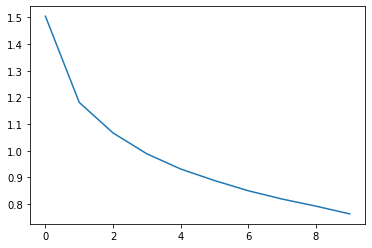

313/313 [==============================] - 5s 16ms/step - loss: 0.7976 - accuracy: 0.7257
Acc= [0.7976493835449219, 0.7257000207901001]


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Flatten
from keras.utils import np_utils
from keras.layers import Conv2D, MaxPooling2D
from keras import regularizers
import glob 
from keras.preprocessing import image 
from keras.datasets import cifar10
import cv2

n_class = 10
(x_train,y_train), (x_test,y_test) = cifar10.load_data() #10가지 그림데이터 load
x_train = x_train.astype('float32')/255
x_test = x_test.astype('float32')/255
y_train = np_utils.to_categorical(y_train, n_class)
y_test = np_utils.to_categorical(y_test, n_class)
#training 시키기 위한 준비작업. data normalize 시켰음 : input data 공통된 format으로 만들기

np.random.seed(777)

fig=plt.figure()
for ie in range(20):
  subplot=fig.add_subplot(4,5,ie+1)
  subplot.imshow(x_train[ie+1000])
plt.show()

n_train,nx,ny,ncol = x_train.shape
model=Sequential()
model.add(Conv2D(30,(3,3),strides = (1,1), 
                 padding = 'same', activation = 'relu', input_shape=(nx,ny,ncol)))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(40,(3,3),strides = (1,1), 
                 padding = 'same', activation='relu'))
model.add(MaxPooling2D((2,2)))
#model.add(Dropout(0.3))
model.add(Flatten())
model.add(Dense(128,activation = 'relu'))  
#model.add(Dropout(0.3))          #dropout 빼는게 정확도 더 올라감
model.add(Dense(n_class,activation='softmax')) 
model.summary()

model.compile(loss='categorical_crossentropy',optimizer='adam',
              metrics=['accuracy'])
H=model.fit(x_train,y_train,batch_size=50,epochs=10)

plt.figure()
plt.plot(H.history['loss'])
plt.show()

score = model.evaluate(x_test, y_test)
print('Acc=', score)

교수님 강아지로 해보자

In [ ]:
nres=32

img = image.load_img('my_dog3.jpg',target_size = (nres,nres))
plt.figure()
plt.imshow(img_tmp)
plt.show()
im2= image.img_to_array(img)/255  #normalize
im3 = im2.reshape((1,nres,nres,3))
rst = model.predict(im3)
print('predict_value=',rst[0,:])
plt.figure()
plt.plot(rst)
plt.show()

from keras import models 
layer_outputs = [layer.output for layer in model.layers[:4]]
activation_model = model.Model(inputs = model.input, outputs = layer_outputs)
    #layer 통과 시 특성맵이 어떻게 filtering 되는지 보기

activations = activation_model.predict(im3)
first_layer=activations[0] #filtering된 layer 중 첫번째(총 필터링 갯수 30개)
print(first_layer_activation.shape)
plt.matshow(first_layer_activation[0,:,:,1], cmap = 'viridis')

flg = plt.figure()
for ie in range(30):
  subplot = fig.add_subplot(5,6,ie+1)
  subplot.matshow(first_layer[0,:,:,ie], cmap = 'viridis')
plt.show()

#Noise(잡음) 없애기 - Batchnormalization

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, Activation, BatchNormalization, Dropout, Flatten
from keras.utils import np_utils
from keras.layers import Conv2D, MaxPooling2D
from keras import regularizers
from keras.optimizers import Adam
import glob 
from keras.preprocessing import image 
from keras.datasets import cifar10
from keras.layers.normalization import BatchNormalization
import cv2

#n_class = 10 : 영상 분류가 아니라 잡음 없앨거라 필요없음
n_gae=300
n_test = 10
(x_train1,y_train1), (x_test1,y_test1) = cifar10.load_data()

x_train1 = x_train1[0:n_gae,:,:,:].astype('float32')/255
x_test1 = x_test1[0:n_test,:,:,:].astype('float32')/255

y_train = x_train1 #현재 x_train1에는 (32,32)영상이 300개 있음. 이걸 y_train = true값으로
y_test= x_test1

sigma = 25 #분산 나타내려함

noise = np.random.normal(0,sigma/255, x_train1.shape)
x_train = x_train1 + np.random.normal(0,sigma/255, x_train1.shape)
#기존 영상을 noisy image로 만드는 것. 
#0: 평균, sigma/255 : sigma=25이고 원래 사진이 0~255의 강도를 가지므로 약 10%의 잡음

x_test = x_test1 + np.random.normal(0,sigma/255, x_test1.shape)

fig=plt.figure()
for ie in range(20):
  subplot=fig.add_subplot(4,5,ie+1)
  subplot.imshow(x_train[ie])
plt.show()

n_train,nx,ny,ncol = x_train.shape
depth_num=5;

model=Sequential()
model.add(Conv2D(64,(3,3),strides = (1,1), 
                 padding = 'same', input_shape=(nx,ny,ncol)))
model.add(BatchNormalization())
model.add(Activation('relu'))
for et in range(depth_num):
  model.add(Conv2D(64,(3,3),strides = (1,1), padding = 'same'))
  model.add(BatchNormalization())
  model.add(Activation('relu'))

model.add(Conv2D(3,(3,3),strides = (1,1), padding = 'same')) #영상의 노이즈가 없는것과 비교하려고함

model.summary()
 
model.compile(loss='mse',optimizer='adam',
              metrics=['accuracy'])
H=model.fit(x_train,y_train,batch_size=50,epochs=10, verbose=1, shuffle = True)
 
plt.figure()
plt.plot(H.history['loss'])
plt.show()

#score = model.evaluate(x_test, y_test)
#print('Acc=', score)



BatchNormalize 안쓰는게 결과 더 좋음

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

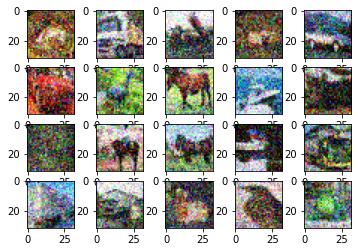

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 32, 32, 64)        1792      
_________________________________________________________________
activation (Activation)      (None, 32, 32, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 32, 32, 64)        36928     
_________________________________________________________________
activation_1 (Activation)    (None, 32, 32, 64)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 32, 32, 64)        36928     
_________________________________________________________________
activation_2 (Activation)    (None, 32, 32, 64)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 32, 32, 64)       

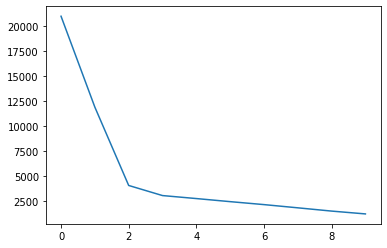

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, Activation, BatchNormalization, Dropout, Flatten
from keras.utils import np_utils
from keras.layers import Conv2D, MaxPooling2D
from keras import regularizers
from keras.optimizers import Adam
import glob 
from keras.preprocessing import image 
from keras.datasets import cifar10
from keras.layers.normalization import BatchNormalization
import cv2
import keras.backend as K

def sum_squared_error(y_true, y_pred):
  return K.sum(K.square(y_pred - y_true))/2  #제곱을 합한걸 error
 #꼭 있는것(ex. mse)만 써야하는게 아니고 나만의 loss function(ex. sum_squared_error) 써도 됨

n_gae=500
n_test = 10
(x_train1,y_train1), (x_test1,y_test1) = cifar10.load_data()

x_train1 = x_train1[0:n_gae,:,:,:].astype('float32')/255
x_test1 = x_test1[0:n_test,:,:,:].astype('float32')/255

x_train1 = x_train1.reshape(n_gae,32,32,3)
y_train = x_train1 #현재 x_train1에는 (32,32)영상이 300개 있음. 이걸 y_train = true값으로
y_test= x_test1.reshape(n_test,32,32,3)

sigma = 50 #분산 나타내려함

noise = np.random.normal(0,sigma/255, x_train1.shape)
x_train = x_train1 + np.random.normal(0,sigma/255, x_train1.shape)
#기존 영상을 noisy image로 만드는 것. 
#0: 평균, sigma/255 : sigma=25이고 원래 사진이 0~255의 강도를 가지므로 약 10%의 잡음

x_test = x_test1 + np.random.normal(0,sigma/255, x_test1.shape)

fig=plt.figure()
for ie in range(20):
  subplot=fig.add_subplot(4,5,ie+1)
  subplot.imshow(x_train[ie])
plt.show()

n_train,nx,ny,ncol = x_train.shape
depth_num=5;

model=Sequential()
model.add(Conv2D(64,(3,3),strides = (1,1), 
                 padding = 'same', input_shape=(nx,ny,ncol)))
#model.add(BatchNormalization())
model.add(Activation('relu'))
for et in range(depth_num):
  model.add(Conv2D(64,(3,3),strides = (1,1), padding = 'same'))
#  model.add(BatchNormalization())
  model.add(Activation('relu'))

model.add(Conv2D(3,(3,3),strides = (1,1), padding = 'same')) #영상의 노이즈가 없는것과 비교하려고함

model.summary()
 
model.compile(loss=sum_squared_error,optimizer=Adam(learning_rate=0.0001),   
              #mse : 제곱한걸 더해서 루트, sum_squared_error : 제곱한걸 더함
              metrics=['accuracy'])
H=model.fit(x_train,y_train,batch_size=50,epochs=10, verbose=1, shuffle = True)
 
plt.figure()
plt.plot(H.history['loss'])
plt.show()

#score = model.evaluate(x_test, y_test)
#print('Acc=', score)

nres = 32
img_tmp = image.load_img('my_dog3.jpg',target_size=(nres,nres))
plt.figure()
plt.imshow(img_tmp)
plt.show()
im2 = image.img_to_array(img_tmp)/255
im2 = im2[:,:,0] +np.random.normal(0,sigma/255,[nres,nres])
plt.matshow(im2) 
im3 =im2.reshape(1,nres,nres,1) #color 하나라서 마지막이 1
rst=model.predict(im3)
print('prd_val=',rst)
plt.matshow(rst[0,:,:,:])

#DnCNN ; 400개의 그림 data로 다시 예제

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, Activation, BatchNormalization, Dropout, Flatten
from keras.utils import np_utils
from keras.layers import Conv2D, MaxPooling2D
from keras import regularizers
from keras.optimizers import Adam
import glob 
from keras.preprocessing import image 
from keras.datasets import cifar10
from keras.layers.normalization import BatchNormalization
import cv2
import keras.backend as K
import os

data_dir = 'data/Train400'
file_list = glob.glob(data_dir+'/*png')
img = cv2.imread(file_list[49],0)
img=img.astype('float32')
plt.figure()
plt.imshow(img,cmap = 'gray')

patch_size = 64  #그림들을 64*64로 나눌것임 (원래 180*180) - 일부분만 들어가게됨
stride = 10 #원래의 그림을 10씩 움직이면서 나눠짐. 많이 겹치지 않고 다른 영상이 들어가는 것처럼 보임
nx,ny = img.shape
#nb=nx//patch_size  #nb를 nx로 나눴을때 몫. 결론)nb=2
#in_pad = int(((nb+1)*patch_size-nx)/2)  #64*3=192. 192-180 = 12. 12만큼 원래 이미지 확장시키려함(64*64의 배수로 만드려고)
#tg_img = np.pad(img,in_pad,'reflect')

#nx,ny 크기 달라도 적용할 수 있도록
nbx=nx//patch_size
in_padx = int(((nbx+1)*patch_size-nx)/2)
nby=ny//patch_size
in_pady = int(((nby+1)*patch_size-ny)/2) 
tg_img = np.pad(img,(in_pady,in_pady),(in_padx,in_padx),'reflect')
plt.figure()
plt.imshow(tg_img,cmap='gray')

ext_img = np.pad(tg_img,stride,'reflect') #tg_img가 192*192였던걸 stride만큼 다시 확장
# => 212*212로 바뀜
plt.figure()
plt.imshow(tg_img,cmap='gray')
mx,my=ext_img.shape 

nptx = int((mx-patch_size)/stride)
npty = int((my-patch_size)/stride)

patches= [] #원래의 그림 확장시킬거임(list 쓴 이유는 처음부터 메모리 할당하지 않아도 필요한 만큼 갖다 붙여도 되는 장점)
for ex in range(nptx):
  for ey in range(npty):
    patches.append(ext_img[stride*ex:stride*ex+patch_size,
                           stride*ey:stride*ey+patch_size])
    
patches = np.array(patches)
plt.imshow(patches[0,:,:],cmap='gray')

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, Activation, BatchNormalization, Dropout, Flatten
from keras.utils import np_utils
from keras.layers import Conv2D, MaxPooling2D
from keras import regularizers
from keras.optimizers import Adam
import glob 
from keras.preprocessing import image 
from keras.datasets import cifar10
from keras.layers.normalization import BatchNormalization
import cv2

data_dir = 'data/Train400'
file_list = glob.glob(data_dir+'/*png')
patch_size = 64 
stride = 10 
patches= [] 
for et in range(len(file_list)):
  img = cv2.imread(file_list[10],0) 
  img=img.astype('float32')

  nx,ny = img.shape

  nbx = nx//patch_size  
  in_padx = int(((nbx+1)*patch_size-nx)/2) 
  nby = ny//patch_size  
  in_pady = int(((nby+1)*patch_size-ny)/2)
  
  tg_img = np.pad(img,(in_pady,in_pady),(in_padx,in_padx),'reflect') #size = (192,192)

  nx2,ny2 = tg_img.shape #nx2,ny2 = 192
  nn=(nx2-patch_size)//stride  
  aa = stride - (nx2-nn*stride - patch_size)
  npd = int(aa/2)
  ext_img = np.pad(tg_img,npd,'reflect')
  mx,my = ext_img.shape  #mx = 194 , patch size가 64니까 130 남음. 130은 stride로 나누어떨어짐

  nptx = int((mx-patch_size)/stride)+1  #nptx=13+1 -> batch 가로에 14개
  npty = int((my-patch_size)/stride)+1  #npty=13+1 -> batch 세로에 14개

  for ex in range(nptx):
   for ey in range(npty):
      patches.append(ext_img[stride*ex:stride*ex+patch_size,
                             stride*ey:stride*ey+patch_size]) 
  

    
patches = np.array(patches)

plt.imshow(patches[len(patches)-1,:,:],cmp = 'gray')

[pat_num, nx,ny] = patches.shape  #pat_num = 78400





#시간이 없어서 78400개 다 training 시키기 어려움  
#간단하게 테스트 할거니까 갯수 줄이자
n_gae = 1000 #(순서대로 뽑으면 그림이 앞에서부터 1000개 뽑으면 400개중 약 5장의 그림만 보게됨)
slt_num = np.random.randint(0,pat_num-1, n_gae) 
 #따라서 0부터 78399(pat_num-1)중 랜덤으로 1000개(n_gae) 뽑을 select number(slt_num) 지정

x_train1 = patches[slt_num,:,:].astype('float32')/255
x_train1 = x_train1.reshape(n_gae,nx,ny,1)
y_train = x_train1
sigma = 50
x_train = x_train1 +np.random.normal(0,sigma/255,x_train1.shape)

np.random.send(777)

fig = plt.figure()
for ie in range(20):
  subplot = fig.add_subplot(4,5,ie+1)
  subplot.imshow(x_train1[ie,:,:,0],cmap = 'gray')
plt.show()

fig = plt.figure()
for ie in range(20):
  subplot = fig.add_subplot(4,5,ie+1)
  subplot.imshow(x_train[ie,:,:,0],cmap = 'gray')
plt.show()



n_train,nx,ny,ncol = x_train.shape
depth_num=7;

model = Sequential()
model.add(Conv2D(64,(3,3),strides = (1,1),
                 padding = 'same', input_shape = (nx,ny,ncol)))
model.add(Activation('relu'))
for et in range(depth_num):
  model.add(Conv2D(64,(3,3),strides = (1,1), padding = 'same'))
  model.add(Activation('relu'))

model.add(Conv2D(1,(3,3),strides = (1,1), padding='same'))
model.summary()

model.compile(loss = 'mse',optimizer=Adam(learning_rate=0.0001))
H=model.fit(x_train,y_train,batch_size = 10, epochs = 10,
            verbose = 1, shuffle = True)

plt.figure()
plt.plot(H.history['loss'])
plt.show()



#교수님 강아지로 해보자

img_tmp = image.load_img('my_dog3.jpg')  
plt.figure()
plt.imshow(img_tmp)
plt.show()

im2 = image.img_to_array(img_tmp)/255  #im2 : color image
im2 = im1[:,:,0]  #im2 R 단색이미지만
plt.matshow(img2, cmap='gray')

[nx2,ny2]= im2.shape
if nx2 %2 == 1:
  im2=im2[:-1,:]
if ny2 %2 == 1:
  im2=im2[:,:-1]
[nx2,ny2]= im2.shape



#training에 들어가려면 64*64에 맞도록 다시 쪼개야하고
#predict 하려면 다시 합쳐야 우리가 원하는 그림 생성됨

nbx=nx2//patch_size
in_padx = int(((nbx+1)*patch_size-nx2)/2) 
nby = ny2//patch_size  
in_pady = int(((nby+1)*patch_size-ny2)/2)
tg_img = np.pad(im2,(in_padx,in_padx),(in_pady,in_pady),'reflect')
  #patch_size의 배수가 되도록 한것
[mx2,my2]=tg_img.shape


#이제 강아지에 잡음을 줘서 predict 가능하도록 해보자
tg_nos=tg_img + np.random.normal(0,sigma/255,tg_img.shape) #잡음 섞기
plt.matshow(tg_nos,cmap = 'gray')

#format 맞춰줘야함
strd=patch_size     #stride=patch size
nptx=mx2//strd
npty=my2//strd
dvd=[]   #dvd=divide 되는 영상들. patch 만드는것과 같음
for ex in range(nptx):
  for ey in range(npty):
    dvd.append(tg_nos[strd*ex:strd*ex+strd
                      strd*ey:strd*ey+strd])

dvd=np.array(dvd)
dvd=dvd.reshape(len(dvd),patch_size,patch_size,1)

rst=model.predict(dvd)
plt.matshow(dvd[0,:,:,:,0],cmap='gray')
plt.matshow(rst[0,:,:,:,0],cmap='gray')



#이제 다시 다 모아야함
com_dvd=np.zeros(tg_img.shape)
it_num=0
for ex in range(nptx):
  for ey in range(npty):
    com_dvd[strd*ex:strd*ex+strd, strd*ey:strd*ey+strd]=rst[it_num,:,:,0]
    it_num=it_num+1

plt.matshow(com_dvd,cmap='gray')